

```
축구선수에 대한 데이터에서 이적료에 영향을 주는 속성이 무엇인지 찾아보자
 id : 선수 고유의 아이디
 name : 이름
 age : 나이
 continent : 선수들의 국적이 포함되어 있는 대륙입니다
 contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
 stat_overall : 선수의 현재 능력치 입니다.
 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
 stat_skill_moves : 선수의 개인기 능력치 입니다.
 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다
```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('FIFA_train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB




```
선수의 이적료와 관련이 있는 것은 무엇일지 본인이 생각해보고, 관련 속성에 대해 분석하기
```




<Axes: xlabel='stat_overall', ylabel='stat_potential'>

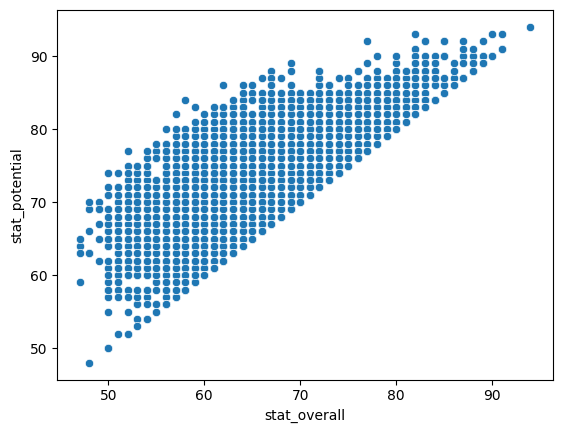

In [ ]:
#선수의 현재 능력치(stat_overall)와 발전정도(stat_potential) 간의 관계를 산점도로 시각화
sns.scatterplot(data = df, x='stat_overall', y='stat_potential')

<Axes: xlabel='stat_overall', ylabel='stat_potential'>

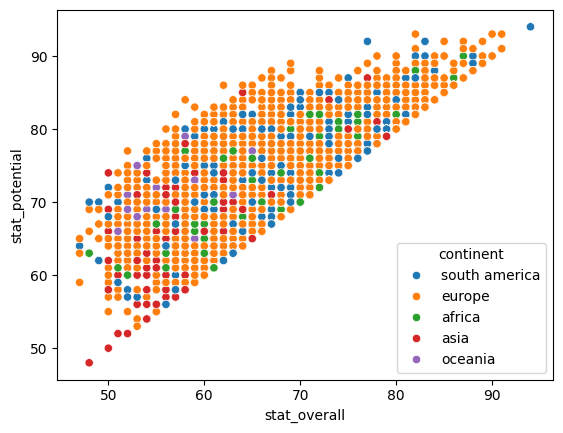

In [ ]:
#대륙으로 구별하여 선수의 현재 능력치(stat_overall)와 발전정도(stat_potential) 간의 관계를 산점도로 시각화
sns.scatterplot(data = df, x='stat_overall', y='stat_potential', hue = 'continent')

<Axes: xlabel='stat_overall', ylabel='stat_potential'>

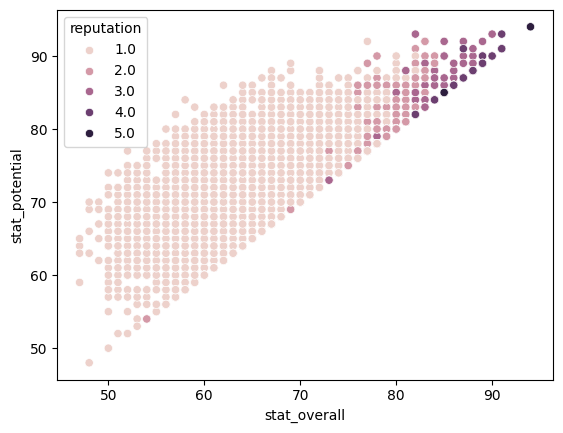

In [ ]:
#유명정도를 구분하여 선수의 현재 능력치(stat_overall)와 발전정도(stat_potential) 간의 관계를 산점도로 시각화

sns.scatterplot(x='stat_overall',y='stat_potential',data=df,hue='reputation')

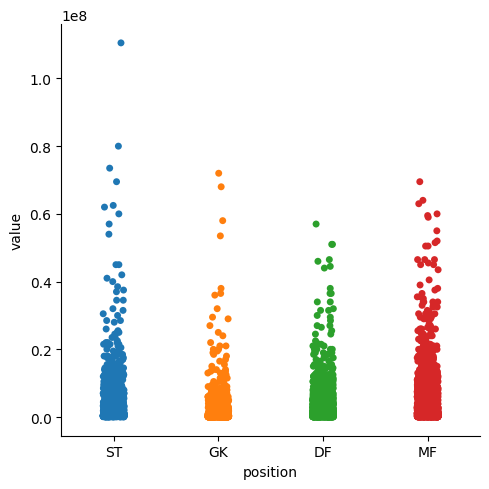

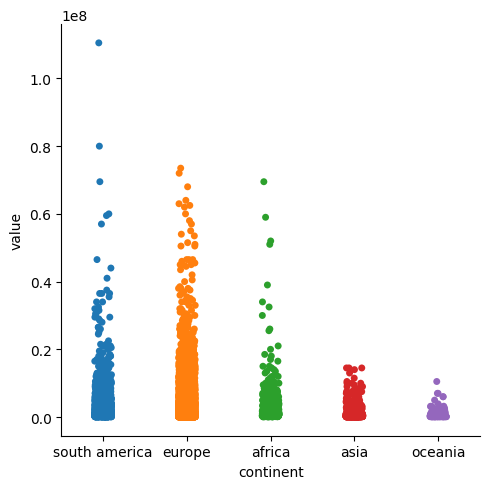

In [ ]:
#포지션과 이적료에 대한 분포를 catplot으로 시각화
sns.catplot(x = 'position', y = 'value', data = df, hue = 'position')
#출신대륙과 이적료에 대한 분포를 catplot으로 시각화
sns.catplot(x = 'continent', y = 'value' , data = df , hue = 'continent')

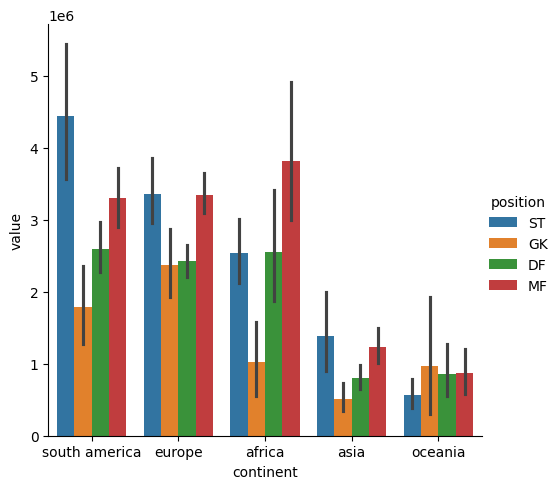

In [ ]:
#출신대륙('continent')별 이적료('value')를 포지션('position')으로 구분:catplot(kind='bar')
sns.catplot(x = 'continent', y = 'value', data = df , hue = 'position', kind = 'bar')

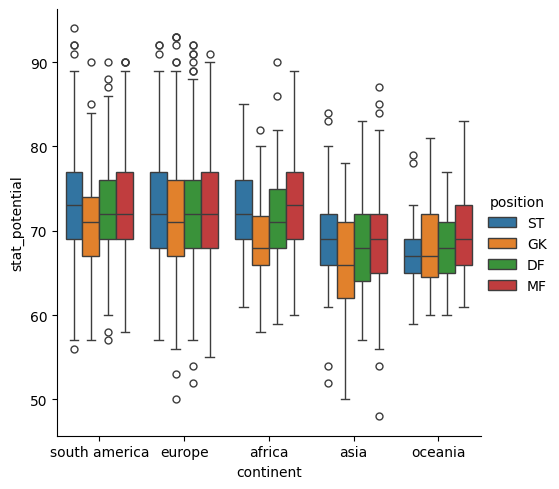

In [ ]:
#출신 대륙('continent')별 발전정도('stat_potential')를 포지션('position')으로 구분하여 박스플롯으로 시각화
sns.catplot(x = 'continent', y = 'stat_potential', hue = 'position', kind = 'box', data = df)

In [ ]:
#교차표 만들기:pd.crosstab
#row는 유명정도('reputation'), column은 나이('age')
#각 셀에는 이적료(vlaue)의 평균(소수첫째자리에서 반올림)

pd.crosstab(df['reputation'], df['age'], values=df['value'], aggfunc='mean').round(0)

age,16,17,18,19,20,21,22,23,24,25,...,31,32,33,34,35,36,37,38,39,40
reputation,,,,,,,,,,,,,,,,,,,,,
1.0,279167.0,429771.0,515029.0,834571.0,1254612.0,1755173.0,1725436.0,2284113.0,2216434.0,2212831.0,...,1654502.0,1227536.0,967203.0,870545.0,449462.0,343023.0,290909.0,109000.0,148000.0,155000.0
2.0,NaN,NaN,27000000.0,14000000.0,16000000.0,17500000.0,19600000.0,16062500.0,14805556.0,12905093.0,...,5477119.0,5038051.0,3307143.0,1908784.0,1555000.0,940278.0,1266875.0,319167.0,466000.0,NaN
3.0,NaN,NaN,NaN,29000000.0,10000000.0,40000000.0,34625000.0,25500000.0,33550000.0,40222222.0,...,17557895.0,13653333.0,7786667.0,6890909.0,4650000.0,1700000.0,8000000.0,325000.0,1600000.0,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64000000.0,...,31500000.0,44333333.0,16500000.0,13833333.0,6900000.0,3000000.0,NaN,NaN,NaN,4000000.0
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95250000.0,38000000.0,NaN,NaN,NaN,14000000.0,NaN,NaN,NaN,NaN


<Axes: xlabel='age', ylabel='reputation'>

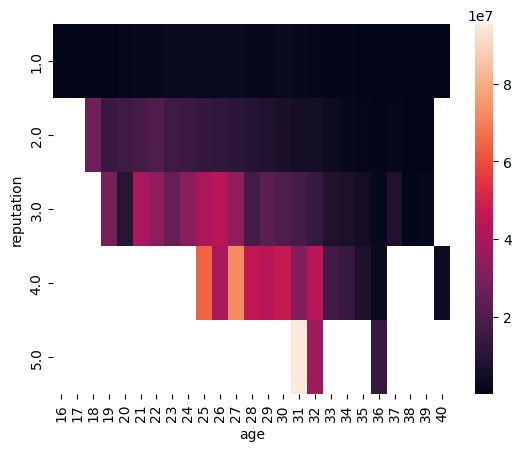

In [ ]:
#히트맵으로 시각화
sns.heatmap(pd.crosstab(df['reputation'] , df['age'] , values = df['value'] , aggfunc = 'mean'))

<Axes: xlabel='position', ylabel='reputation'>

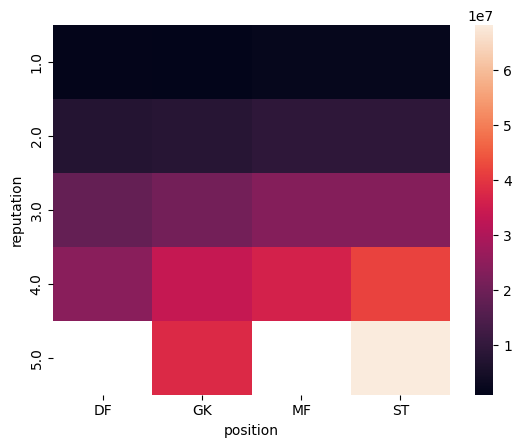

In [ ]:
sns.heatmap(pd.crosstab(df['reputation'] , df['position'] , values = df['value'] , aggfunc = 'mean'))

In [ ]:
#다양한 방법으로 시각화 해 보고 분석결과를 작성해 보자
#코랩 url을 패들렛에 작성할것

1. 유럽의 선수들은 포지션 별 불균형이 거의 없이 균일한 반면 , 남아메리카 대륙의 선수들은 상당수가 스트라이커 포지션으로 뛰고 있는 것을 확인할 수 있다. 아시아 출신의 선수들을 유럽이나 남미의 선수들과 비교했을 때 같은 스텟을 가지고 있더라도 시장평가가 박한 경향이 있다.

2. 현재 능력과 그 선수의 잠재력은 비례하는 것을 알 수 있다.

3. 여러 포지션 중 ST(스트라이커)가 대체로 몸값이 비싼 것으로 보아 골잡이가 축구에서 중요한 역할을 한다고 예상할 수 있다.
